In [1]:
# This notebook uses Python 3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
PATH_BASE = os.getcwd()
#print("PATH_BASE = ", PATH_BASE)

os.chdir( "../../figs")
PATH_FIGS = os.getcwd()
#print("PATH_FIGS = ", PATH_FIGS )

os.chdir( PATH_BASE )
os.chdir( "../libs")
PATH_LIBS = os.getcwd()
#print("PATH_LIBS = ", PATH_LIBS )

# re-set path back to base
os.chdir( PATH_BASE )
#print("Currently in: ", os.getcwd() )


In [3]:
# Libraries created by MZ
os.chdir( PATH_LIBS )

import plotting as pg
import costgrad_vec as cg
import common as nc
import algos_vec as ao
import params as pm

os.chdir( PATH_BASE )


# ==================== EXPERIMENT ======================

In [4]:
nom = cg.get_cost_names()
print(nom)
name = nom[3]
print("name = ", name)

p_init = cg.get_p_init(name)
print("p_init = ", p_init)

p_target = cg.get_p_target(name)
print("p_target = ", p_target)

# parameters ----------------------------
num      = 225
b_print  = True
rho_targ = 0.1
alpha    = 0.15

# Increase alpha by a factor of i_factor at i = i_manual.  To skip this, set i<0
i_manual = -1
i_factor = 1

#g_rho_type = "original"
g_rho_type = "new"

# Definition of rho --------------
print("g_rho_type = ", g_rho_type)

# for sumd plot ---------------
g_sumd_line_freq = 20


['x^2', 'x^4', 'ellipse', '1Dsigwell', '2Dshell', 'Beale']
name =  1Dsigwell
p_init =  [-3.]
p_target =  [0.]
g_rho_type =  new


In [5]:
# ========================== GD Family ==========================
#type_opt = "dp_GD_basic"
#type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
type_opt = "dp_Adam"

alpha, num1 = pm.get_alpha_num( name, type_opt )
print("new values: alpha,num1 = ", alpha, num1)

d_res_GD = ao.do_GDFamily(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, i_manual, i_factor, g_rho_type)


new values: alpha,num1 =  0.2 500
cost_old =  0.9999546021312976
1: cost,rho,dotp = 0.9983190329145281, [1.56255802], 1.0
2: cost,rho,dotp = 0.9925305061107136, [1.30376651], 1.0
3: cost,rho,dotp = 0.9701560798054079, [1.14352322], 1.0
4: cost,rho,dotp = 0.8932128759524413, [0.95765748], 1.0
5: cost,rho,dotp = 0.6851288510323614, [0.62010915], 1.0
6: cost,rho,dotp = 0.34620941054823556, [0.11171078], 1.0
7: cost,rho,dotp = 0.09782156536385195, [0.30805681], 1.0
8: cost,rho,dotp = 0.021141048523891752, [0.46149714], 1.0
9: cost,rho,dotp = 0.004813699170428779, [0.47270657], 1.0
10: cost,rho,dotp = 0.0012468624799575358, [0.4502709], 1.0
11: cost,rho,dotp = 0.0003679489917780026, [0.42211742], 1.0
12: cost,rho,dotp = 0.00012225674896251823, [0.39388398], 1.0
13: cost,rho,dotp = 4.5160603938633175e-05, [0.36676583], 1.0
14: cost,rho,dotp = 1.8334541268210917e-05, [0.34102664], 1.0
15: cost,rho,dotp = 8.099393507773031e-06, [0.31670885], 1.0
16: cost,rho,dotp = 3.859365497069793e-06, [0.29

max index =  225
final arclength (sumd_x) =  2.9960691010098970306
final distance (sumd_y) =  2.9960691010098970306


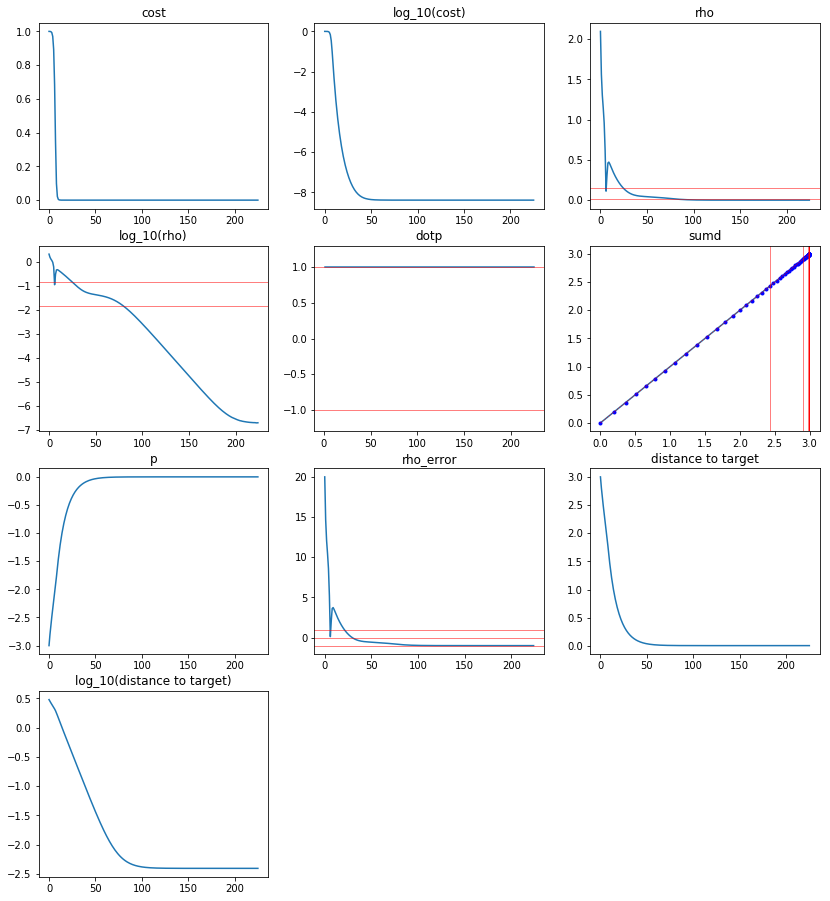

In [6]:
pg.do_Plots_final(d_res_GD, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_GD)
#filename = None
#pg.do_plot_2Dshell_special(name, d_res_GD, "2Dshell", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


In [7]:
# ========================== Neo Family ==========================
#type_opt = "dp_GD_basic"
type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
#type_opt = "dp_Adam"

alpha = pm.g_alpha_Neo_init
d_res_Neo = ao.do_Neograd(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)
#d_res_Neo = ao.do_Neograd_dbl(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)


0  ============================================
alpha,rho =  [0.08145346] [2.27175723e-05]  ---------------
1  ============================================
alpha,rho =  [0.39280733] [0.00018489]  ---------------
1: cost,rho,dotp = 0.9999545832804444, [0.00018489], 1.0
2  ============================================
alpha,rho =  [1.27810137] [0.00089219]  ---------------
2: cost,rho,dotp = 0.9999545022120158, [0.00089219], 1.0
3  ============================================
alpha,rho =  [3.09488702] [0.00290859]  ---------------
3: cost,rho,dotp = 0.999954237275044, [0.00290859], 1.0
4  ============================================
alpha,rho =  [6.00083662] [0.00707509]  ---------------
4: cost,rho,dotp = 0.9999535881706624, [0.00707509], 1.0
5  ============================================
alpha,rho =  [9.8388919] [0.01383765]  ---------------
5: cost,rho,dotp = 0.9999522977505341, [0.01383765], 1.0
6  ============================================
alpha,rho =  [14.20493711] [0.02301588]  

172  ============================================
alpha,rho =  [883.54339617] [0.10955814]  ---------------
172: cost,rho,dotp = 4.294517642254146e-09, [0.10955814], 1.0
173  ============================================
alpha,rho =  [783.98679258] [0.11269876]  ---------------
173: cost,rho,dotp = 4.226635803234022e-09, [0.11269876], 1.0
174  ============================================
alpha,rho =  [684.58704343] [0.11451967]  ---------------
174: cost,rho,dotp = 4.18469266268967e-09, [0.11451967], 1.0
175  ============================================
alpha,rho =  [591.71825605] [0.11569476]  ---------------
175: cost,rho,dotp = 4.159297755945517e-09, [0.11569476], 1.0
176  ============================================
alpha,rho =  [508.08390306] [0.11646074]  ---------------
176: cost,rho,dotp = 4.144120833675496e-09, [0.11646074], 1.0
177  ============================================
alpha,rho =  [434.4435029] [0.11695051]  ---------------
177: cost,rho,dotp = 4.135126581471313e-09, 

max index =  225
final arclength (sumd_x) =  2.999999973742895811
final distance (sumd_y) =  2.99999997374289581


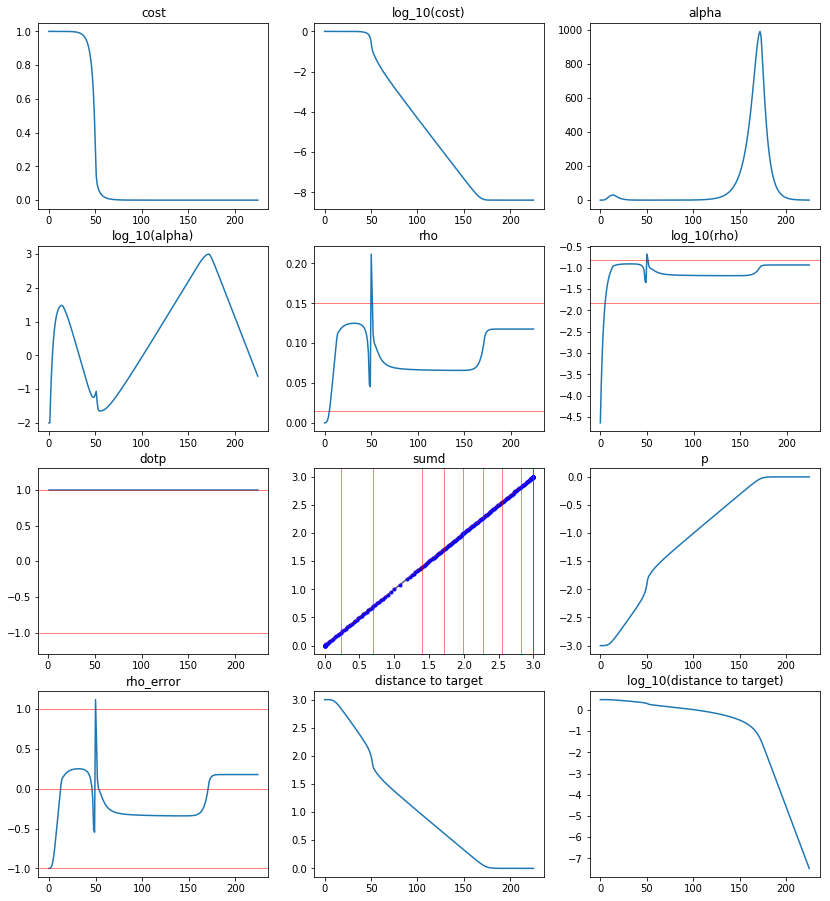

In [8]:
pg.do_Plots_final(d_res_Neo, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_Neo)
#filename = None
#pg.do_plot_2Dshell_special(name, d_res_Neo, "2Dshell", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


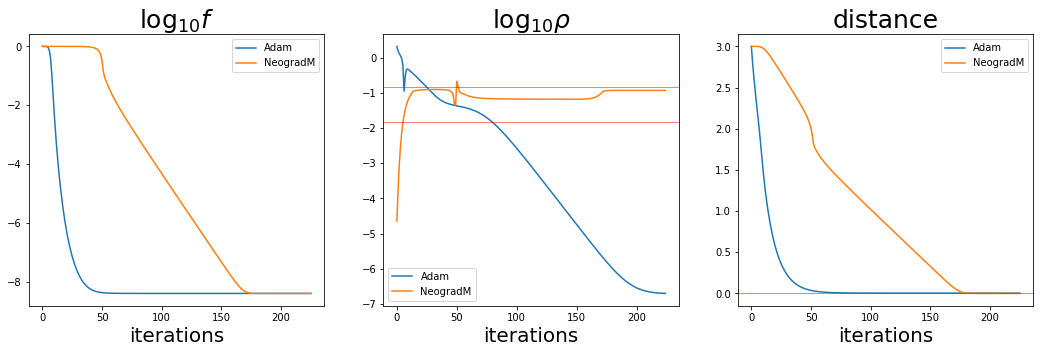

In [9]:
nrows = 1
ncols = 3
plt.figure(1, figsize=(6*ncols, 5*nrows))

size_title = 25
size_label = 20

idx = 1
# log(cost) --------------------------------
plt.subplot(nrows, ncols, idx)
plt.plot( np.log10(d_res_GD["cost"]), label="Adam")
plt.plot( np.log10(d_res_Neo["cost"]), label="NeogradM")
plt.title(r'$\log_{10}f$', fontsize= size_title)
plt.legend(loc = 'upper right')
plt.xlabel(r'iterations', fontsize= size_label)

# log(rho) --------------------------------
idx += 1
plt.subplot(nrows, ncols, idx)
plt.plot( np.log10(d_res_GD["rho"]), label="Adam")
plt.plot( np.log10(d_res_Neo["rho"]), label="NeogradM")
plt.title(r'$\log_{10} \rho$', fontsize= size_title)
plt.legend(loc = 'lower left')
plt.xlabel(r'iterations', fontsize= size_label)
plt.axhline(y=np.log10(pm.g_rhomin), color='red', linewidth=0.5)
plt.axhline(y=np.log10(pm.g_rhomax), color='red', linewidth=0.5)

# dist --------------------------------
idx += 1
plt.subplot(nrows, ncols, idx)
plt.plot( d_res_GD["dist"], label="Adam")
plt.plot( d_res_Neo["dist"], label="NeogradM")
plt.title(r'distance', fontsize= size_title)
plt.legend(loc = 'upper right')
plt.xlabel(r'iterations', fontsize= size_label)
plt.axhline(y=0, color='red', linewidth=0.5)

plt.savefig(PATH_FIGS + "/sigwell-triple.png")
#plt.show()


## Specialty plot

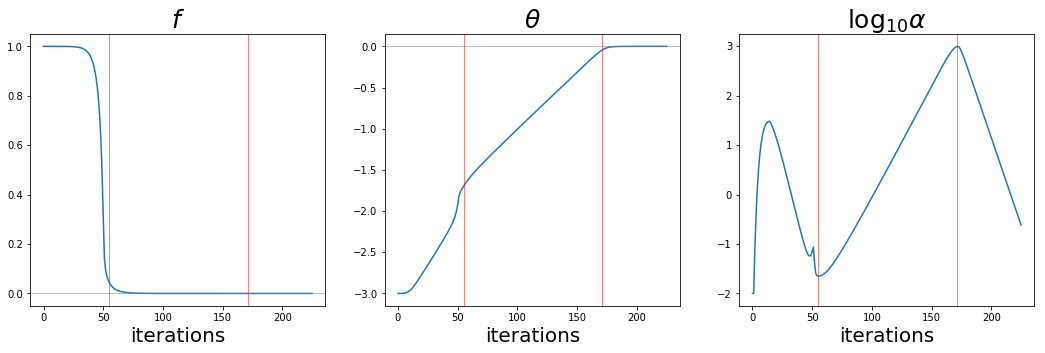

In [10]:
nrows = 1
ncols = 3
plt.figure(1, figsize=(6*ncols, 5*nrows))

size_title = 25
size_label = 20

idx = 1
# cost --------------------------------
plt.subplot(nrows, ncols, idx)
plt.plot( d_res_Neo["cost"] ) 
plt.title(r'$f$', fontsize= size_title)
plt.xlabel(r'iterations', fontsize= size_label)
plt.axhline(y=0, color='grey', linewidth=0.5)
plt.axvline(x=55, color='red', linewidth=0.5)
plt.axvline(x=171, color='red', linewidth=0.5)

# dist --------------------------------
idx += 1
plt.subplot(nrows, ncols, idx)
plt.plot( d_res_Neo["p"] )
plt.title(r'$\theta$', fontsize= size_title)
plt.xlabel(r'iterations', fontsize= size_label)
plt.axhline(y=0, color='grey', linewidth=0.5)
#plt.ylim((0.15,-3.15))
plt.axvline(x=55, color='red', linewidth=0.5)
plt.axvline(x=171, color='red', linewidth=0.5)

# log(alpha) --------------------------------
idx += 1
plt.subplot(nrows, ncols, idx)
plt.plot( np.log10(d_res_Neo["alpha"]) )
plt.title(r'$\log_{10} \alpha$', fontsize= size_title)
plt.xlabel(r'iterations', fontsize= size_label)
#plt.axvline(x=13, color='red', linewidth=0.5)
plt.axvline(x=55, color='red', linewidth=0.5)
plt.axvline(x=171, color='red', linewidth=0.5)

plt.savefig(PATH_FIGS + "/sigwell-alpha.png")
#plt.show()


# Other

In [11]:
# Check at exactly which point the CF goes through inflection point (st CF=0.5, approximately)
for i in range(60):
    print("i,CF = ", i, d_res_Neo["cost"][i])
          
    

i,CF =  0 0.9999546021312976
i,CF =  1 0.99995460007047143374
i,CF =  2 0.99995458328044438374
i,CF =  3 0.9999545022120157164
i,CF =  4 0.99995423727504390574
i,CF =  5 0.99995358817066242455
i,CF =  6 0.99995229775053404224
i,CF =  7 0.9999500851053483502
i,CF =  8 0.9999466574266638398
i,CF =  9 0.99994169199249636327
i,CF =  10 0.99993479490940708734
i,CF =  11 0.99992544221776397736
i,CF =  12 0.99991290019504254353
i,CF =  13 0.99989611160821916474
i,CF =  14 0.9998735227492884468
i,CF =  15 0.99984406376088595306
i,CF =  16 0.9998071540144153101
i,CF =  17 0.9997607325649908126
i,CF =  18 0.99970231267671511277
i,CF =  19 0.9996287489725999991
i,CF =  20 0.99953607490978582857
i,CF =  21 0.999419285842702764
i,CF =  22 0.99927206565221079153
i,CF =  23 0.99908644089017756507
i,CF =  24 0.99885234319488319307
i,CF =  25 0.9985570553503024583
i,CF =  26 0.99818450955841477376
i,CF =  27 0.99771439769579956647
i,CF =  28 0.99712104189713303404
i,CF =  29 0.9963719588554350165
i,CF 

In [12]:
# It happens near i=49

# Profile of CF

In [13]:
nom = cg.get_cost_names()
print(nom)
name = nom[3]
print("name = ", name)

p_init = cg.get_p_init(name)
print("p_init = ", p_init)

N       = 1000
p_start = -4
p_end   = 4
dp      = (p_end - p_start)/(1.0*N)

list_p    = []
list_grad = []
list_cost = []

for i in range(N):
    p     = p_start + i*dp
    pa    = np.array([p])
    grad  = cg.get_grad(name, pa) 
    cost  = cg.get_cost(name, pa)
    list_p.append(p)
    list_cost.append(cost)    
    list_grad.append(grad)


['x^2', 'x^4', 'ellipse', '1Dsigwell', '2Dshell', 'Beale']
name =  1Dsigwell
p_init =  [-3.]


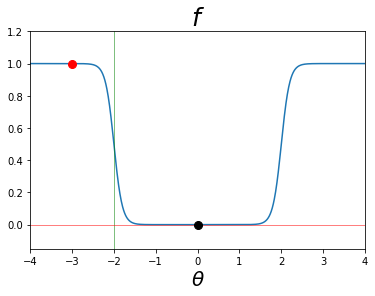

In [14]:
plt.plot( list_p, list_cost)
plt.axvline(x= -2, color='green', linewidth=0.5)
#plt.axvline(x= 0, color='green', linewidth=0.5)
#plt.axvline(x= 2, color='green', linewidth=0.5)
plt.xlim((-4.0, 4))
plt.ylim((-0.15, 1.2))
plt.title(r'$f$', fontsize= size_title)
plt.xlabel(r'$\theta$', fontsize= size_label)
plt.axhline(y=0, color='red', linewidth=0.5)
plt.plot( -3, 1, 'ro', markersize=8)
plt.plot( 0, 0, 'ko', markersize=8)

plt.savefig(PATH_FIGS + "/sigwell-profile.png")
#plt.show()
